# k-Means Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import seaborn as sns; sns.set() 
import warnings

sns.set_style('darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

np.random.seed(123456789)
np.random.seed(987654321)

## Introduction

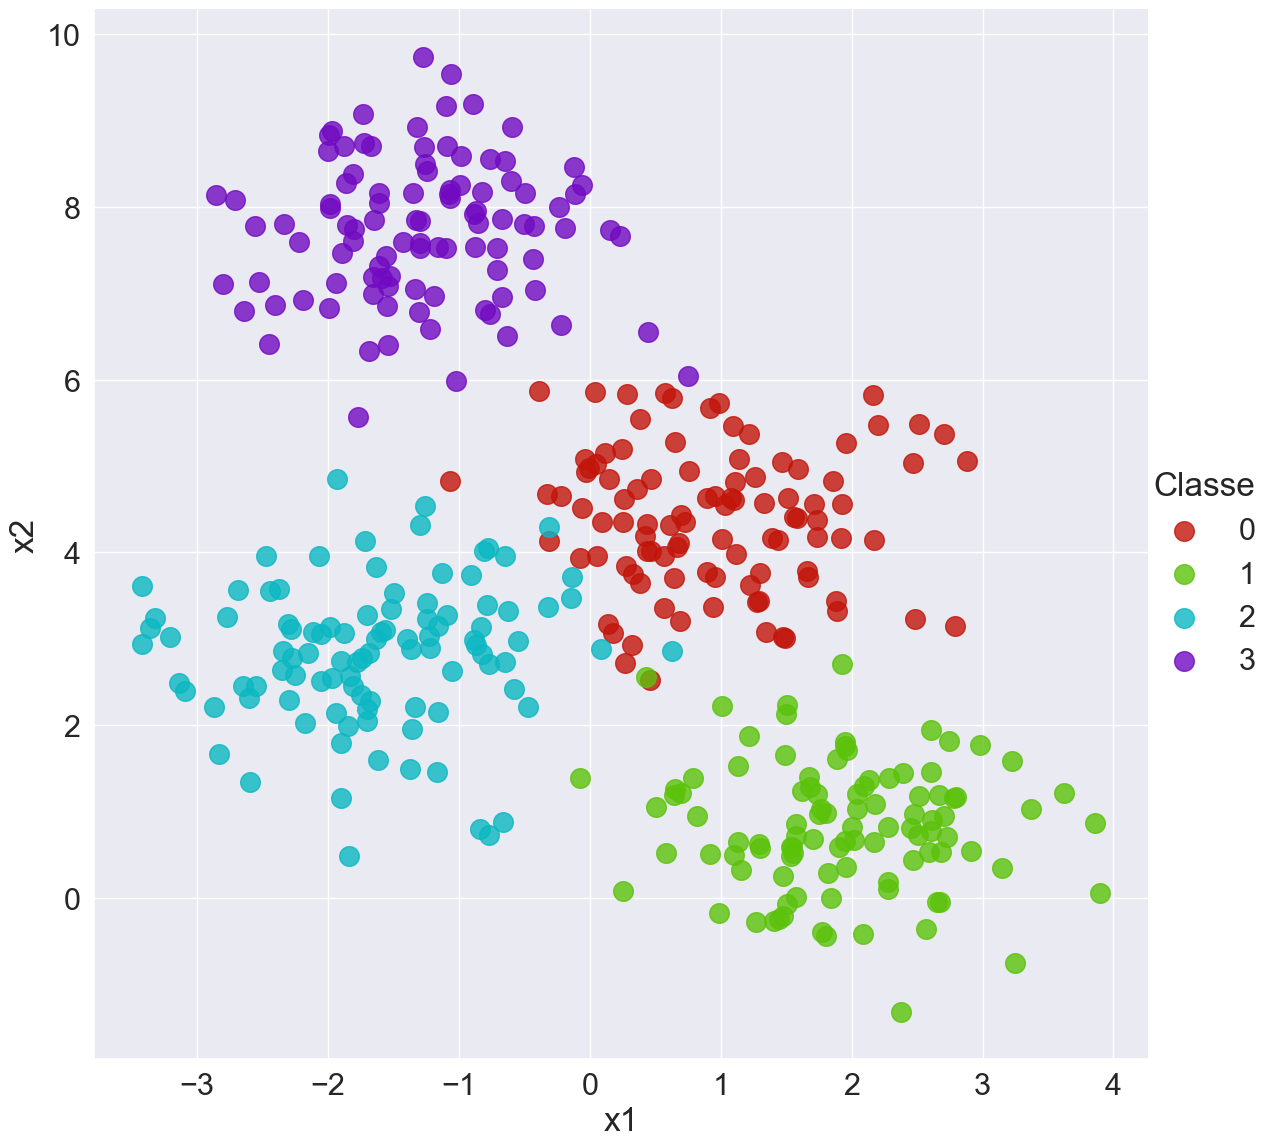

In [14]:
from sklearn.datasets import make_blobs
nb_centers = 4
X, y_true = make_blobs(n_samples=400, centers=nb_centers,
                       cluster_std=.8, random_state=0)

donnees = pd.DataFrame(X, columns=['x1','x2'])
donnees['Classe'] = y_true


sns.lmplot(x='x1',y='x2', hue='Classe', 
                data=donnees, 
                fit_reg=False, 
                height = 12, 
                aspect =1, 
                palette= sns.hls_palette(nb_centers, l=.4, s=.9),
                scatter_kws={'s':200}) ;

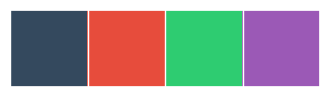

In [3]:
flatui = ["#34495e", "#e74c3c", "#2ecc71", "#9b59b6"]
sns.palplot(sns.color_palette(flatui))

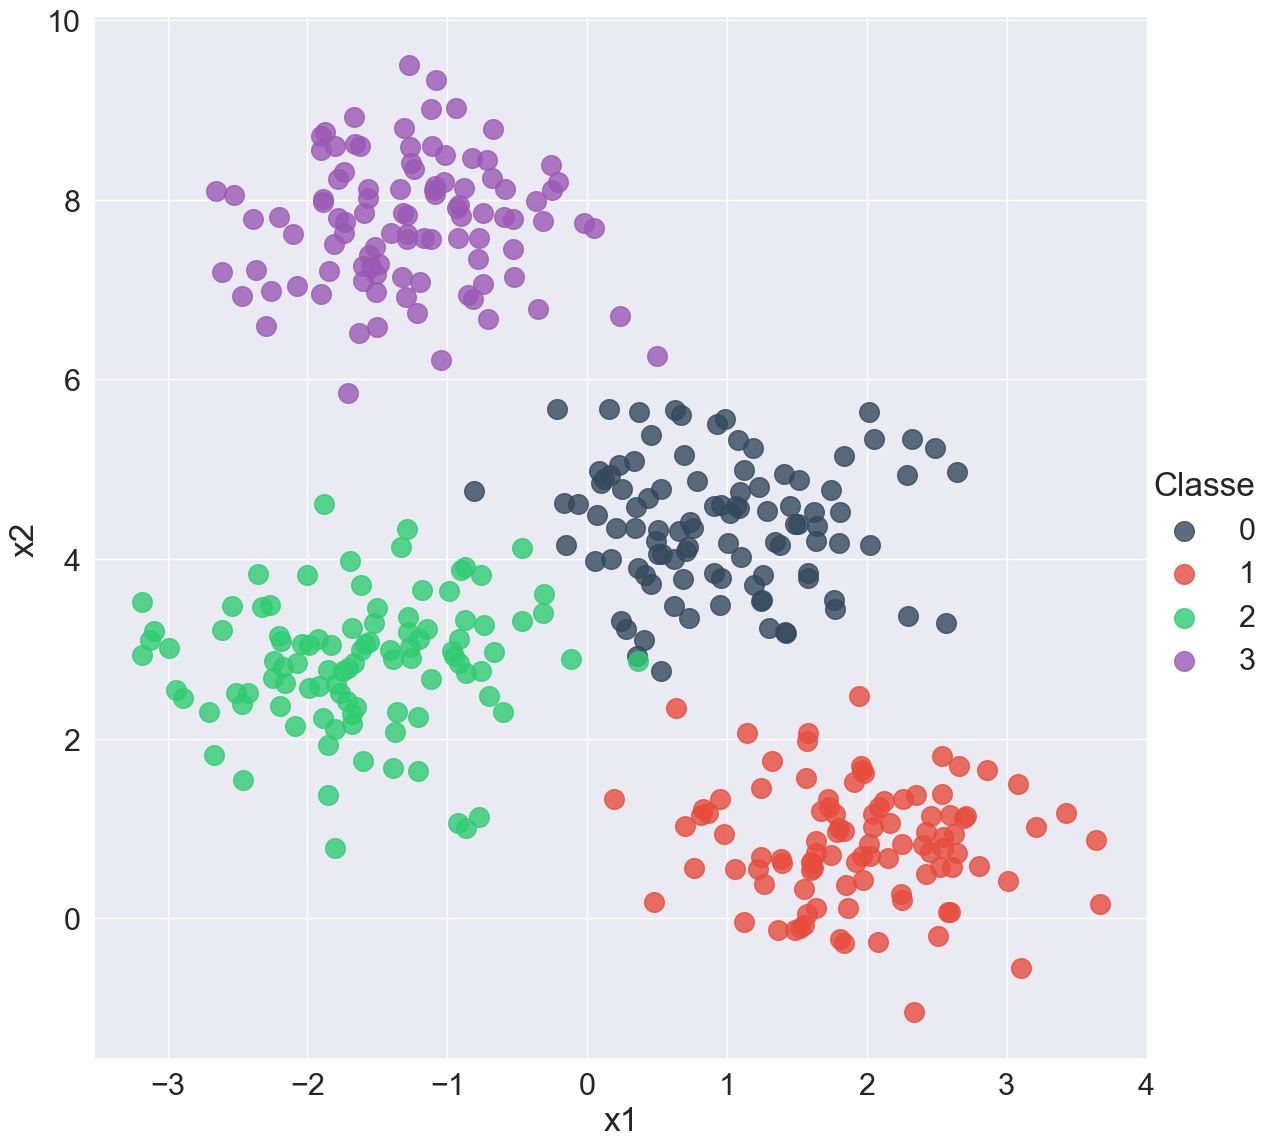

In [4]:
sns.lmplot(x='x1',y='x2', hue='Classe', 
                data=donnees, 
                fit_reg=False, 
                height = 12, 
                aspect =1, 
                palette= flatui,
                scatter_kws={'s':200}) ;

In [5]:
from sklearn.cluster import KMeans
np.random.seed(123456789)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
#kmeans.fit_predict(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [6]:
kmeans.cluster_centers_

array([[ 1.94018664,  0.82975556],
       [-1.29032275,  7.75779225],
       [ 0.9105548 ,  4.37329423],
       [-1.67423658,  2.81537942]])

In [7]:
y_kmeans = kmeans.predict(X)

In [8]:
import pandas as pd
pd.DataFrame([y_kmeans,y_true])

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2,3,3,2,3,1,0,2,3,0,...,3,1,2,0,0,2,2,0,2,0
1,3,2,2,0,2,3,1,0,2,1,...,2,3,0,1,1,0,0,1,2,1


In [9]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=['x1','x2'])
centers.reset_index(inplace=True)
centers.rename(columns={'index':'Classe'},inplace=True)
centers.head()

,Classe,x1,x2
0,0,1.940187,0.829756
1,1,-1.290323,7.757792
2,2,0.910555,4.373294
3,3,-1.674237,2.815379


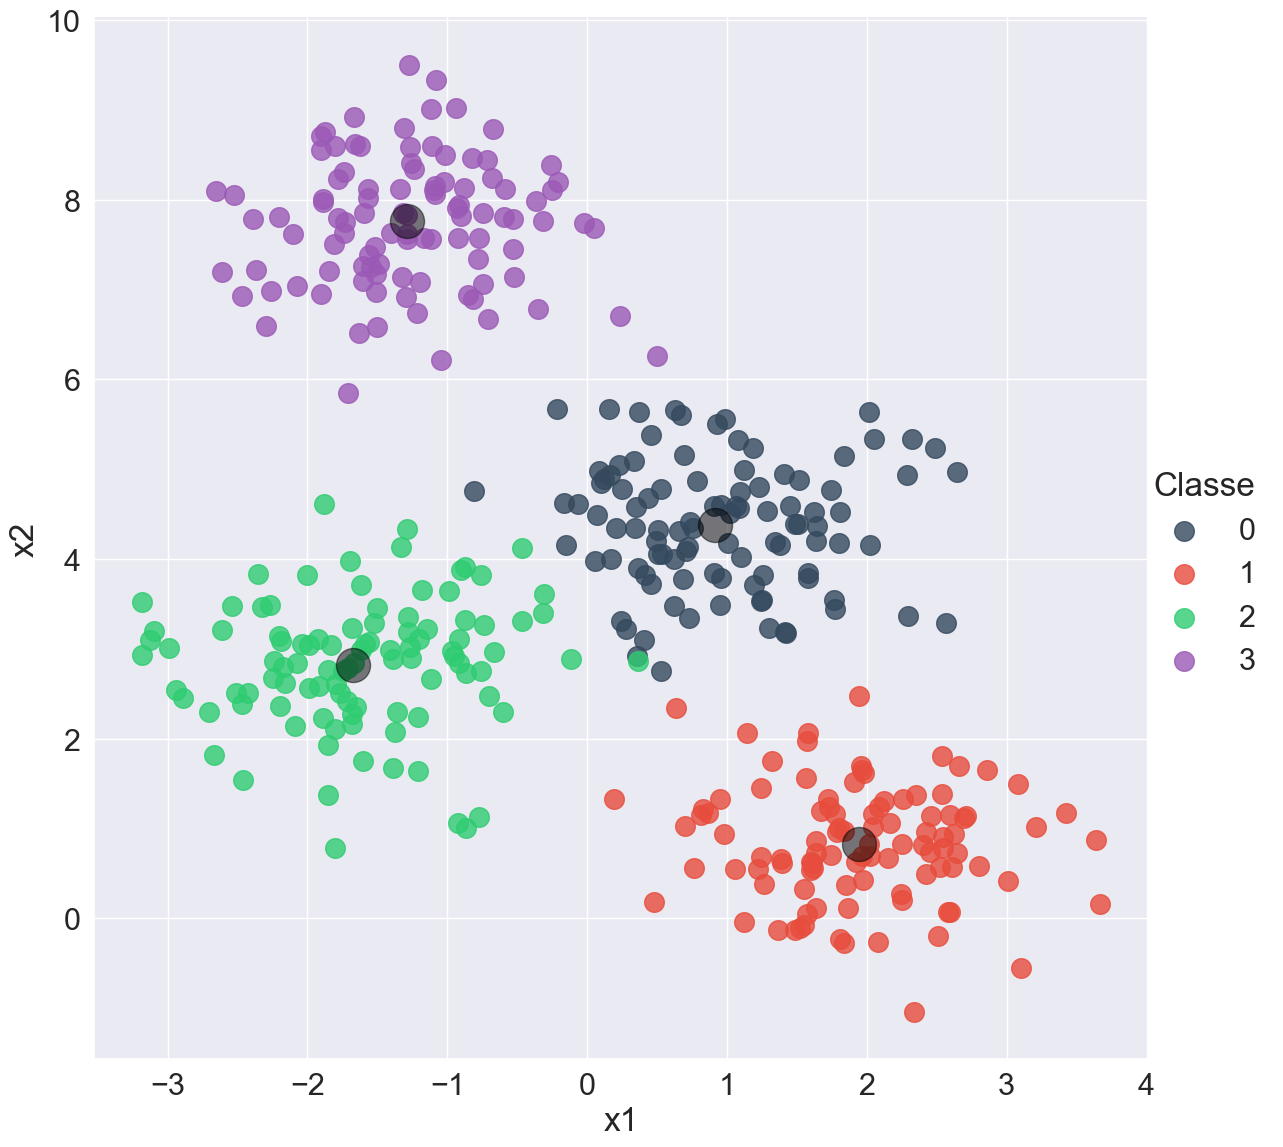

In [10]:
sns.lmplot(x='x1',y='x2', hue='Classe', 
                data=donnees, 
                fit_reg=False, 
                height = 12, 
                aspect =1, 
                palette= flatui,
                scatter_kws={'s':200}) ;
plt.scatter(centers.x1, 
            centers.x2,
            c='black', 
            s=600, alpha=0.5);

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg

0.6264788489488764

##  Silhouette

For n_clusters = 2 The average silhouette_score is : 0.544620991411019


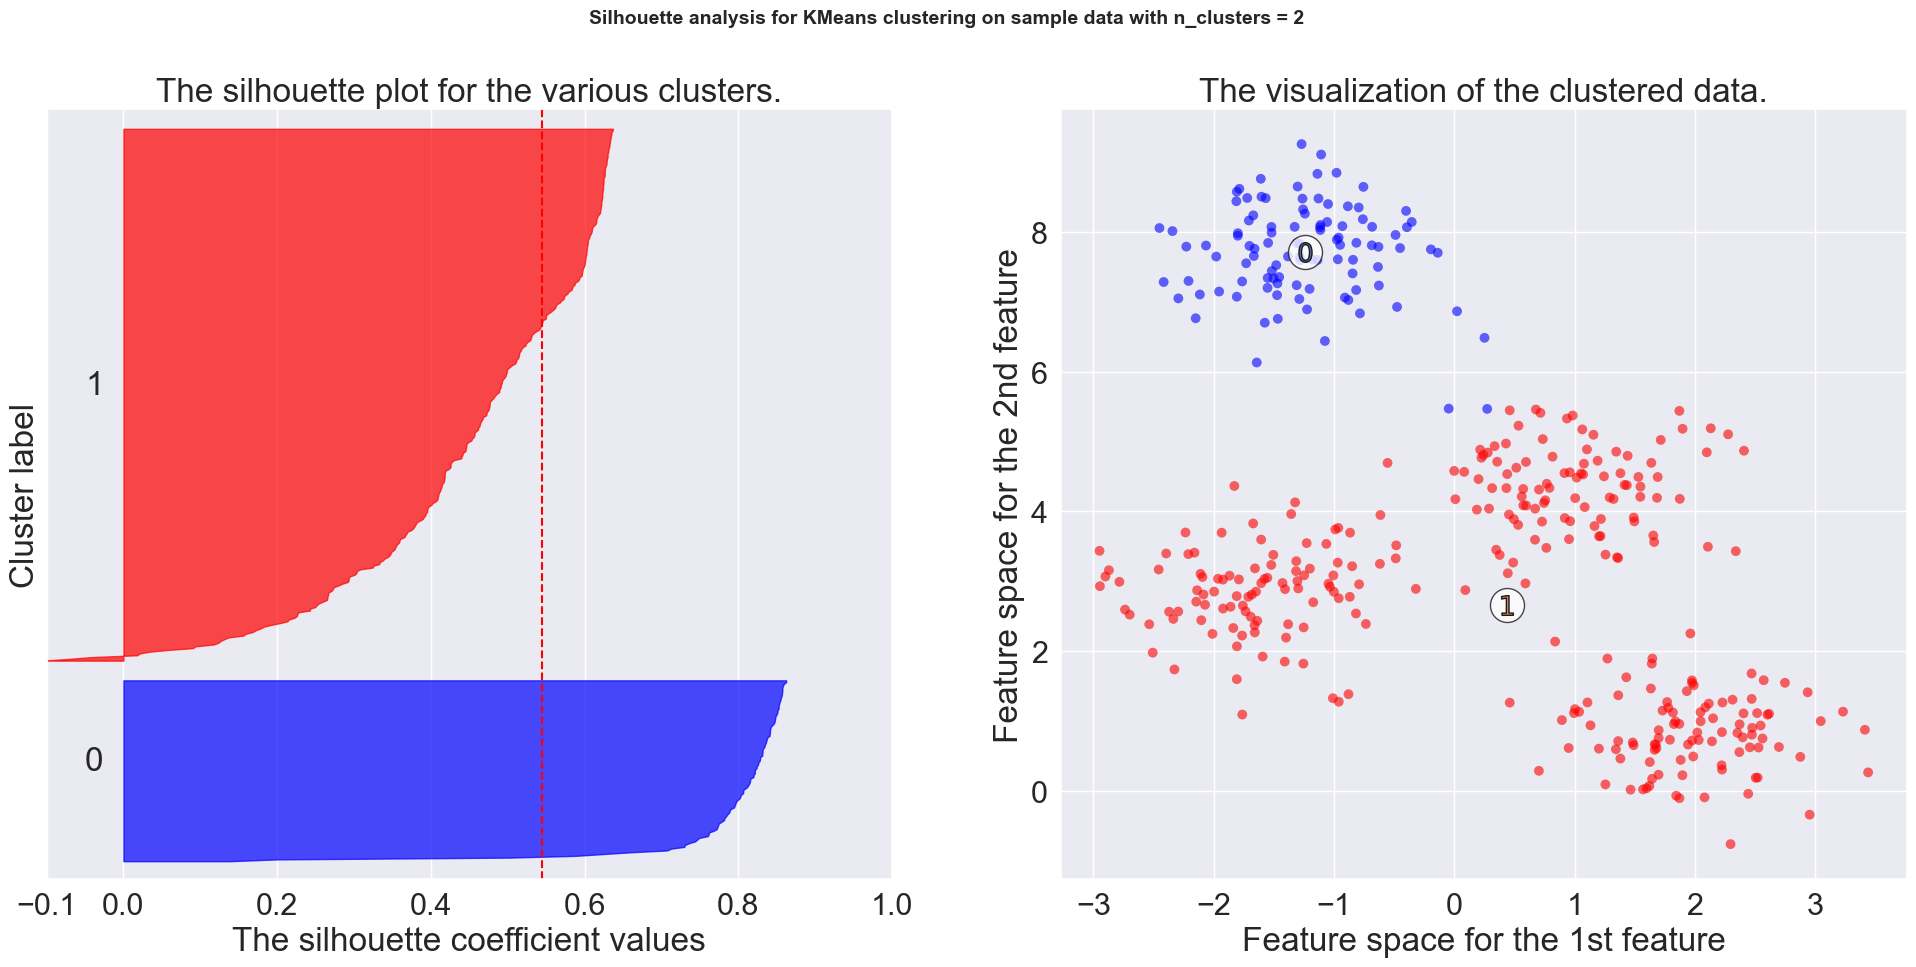

For n_clusters = 3 The average silhouette_score is : 0.5920086410160104


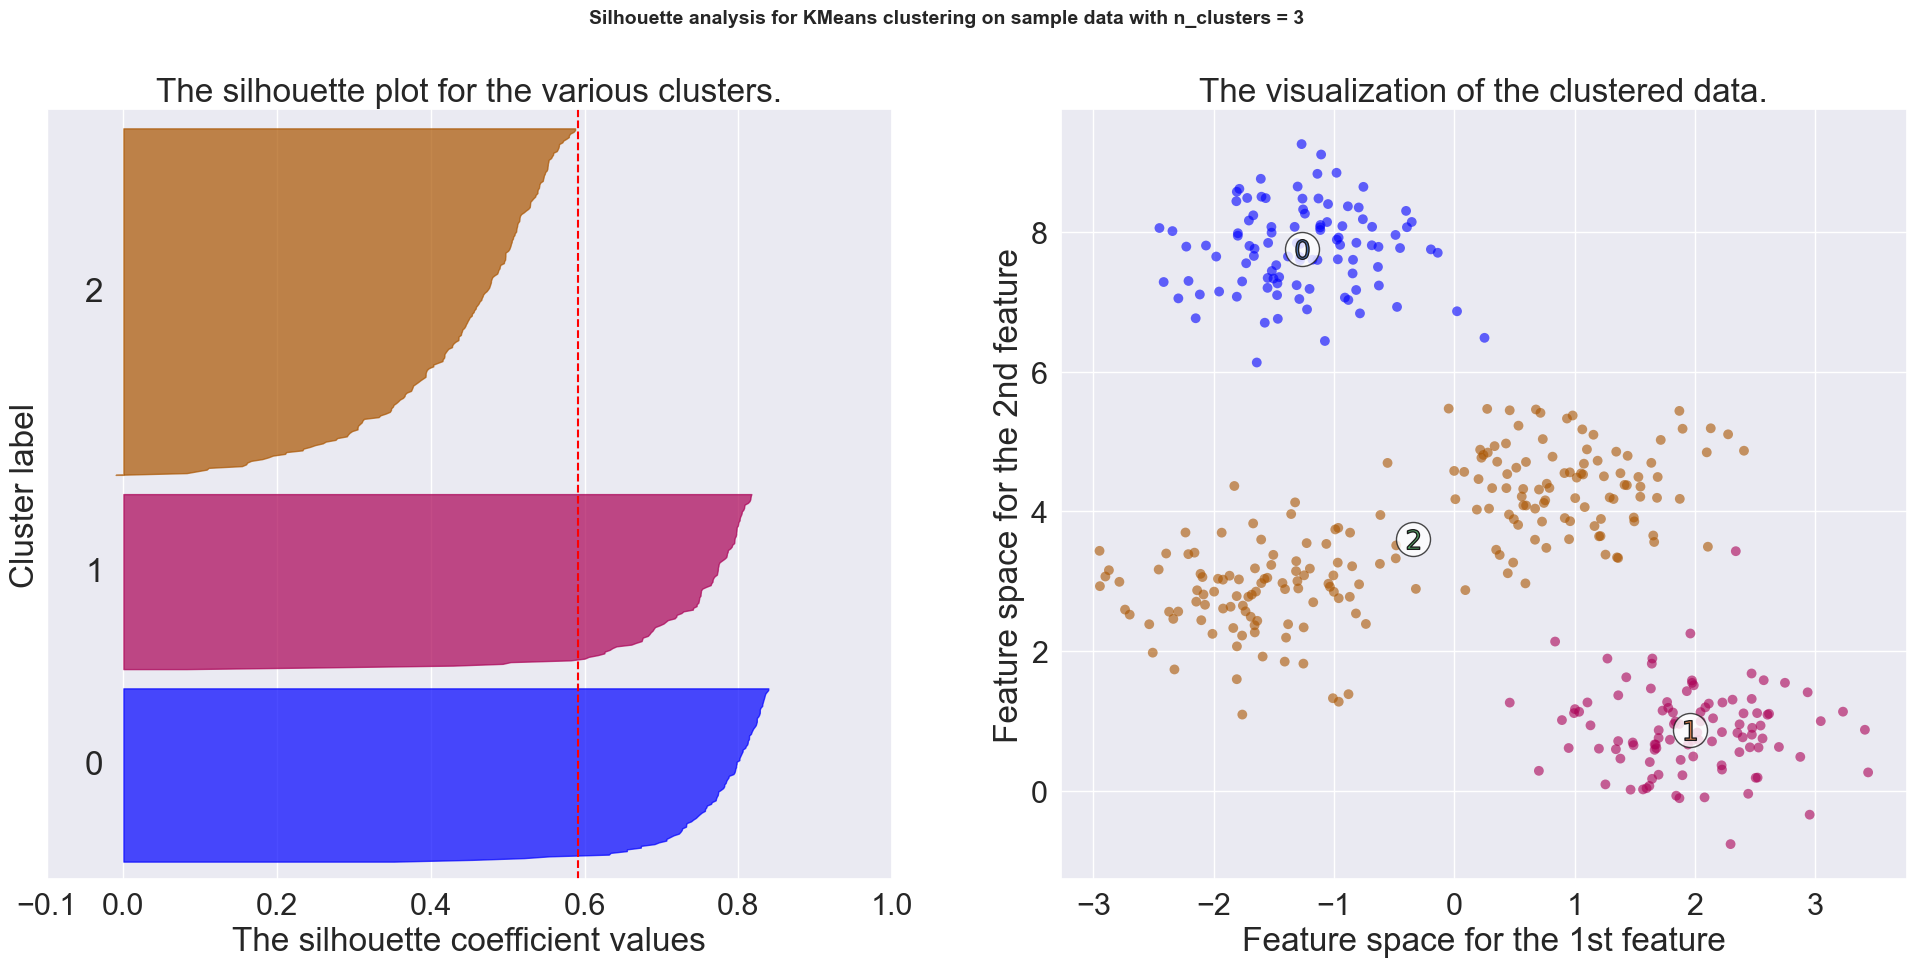

For n_clusters = 4 The average silhouette_score is : 0.6783938627405857


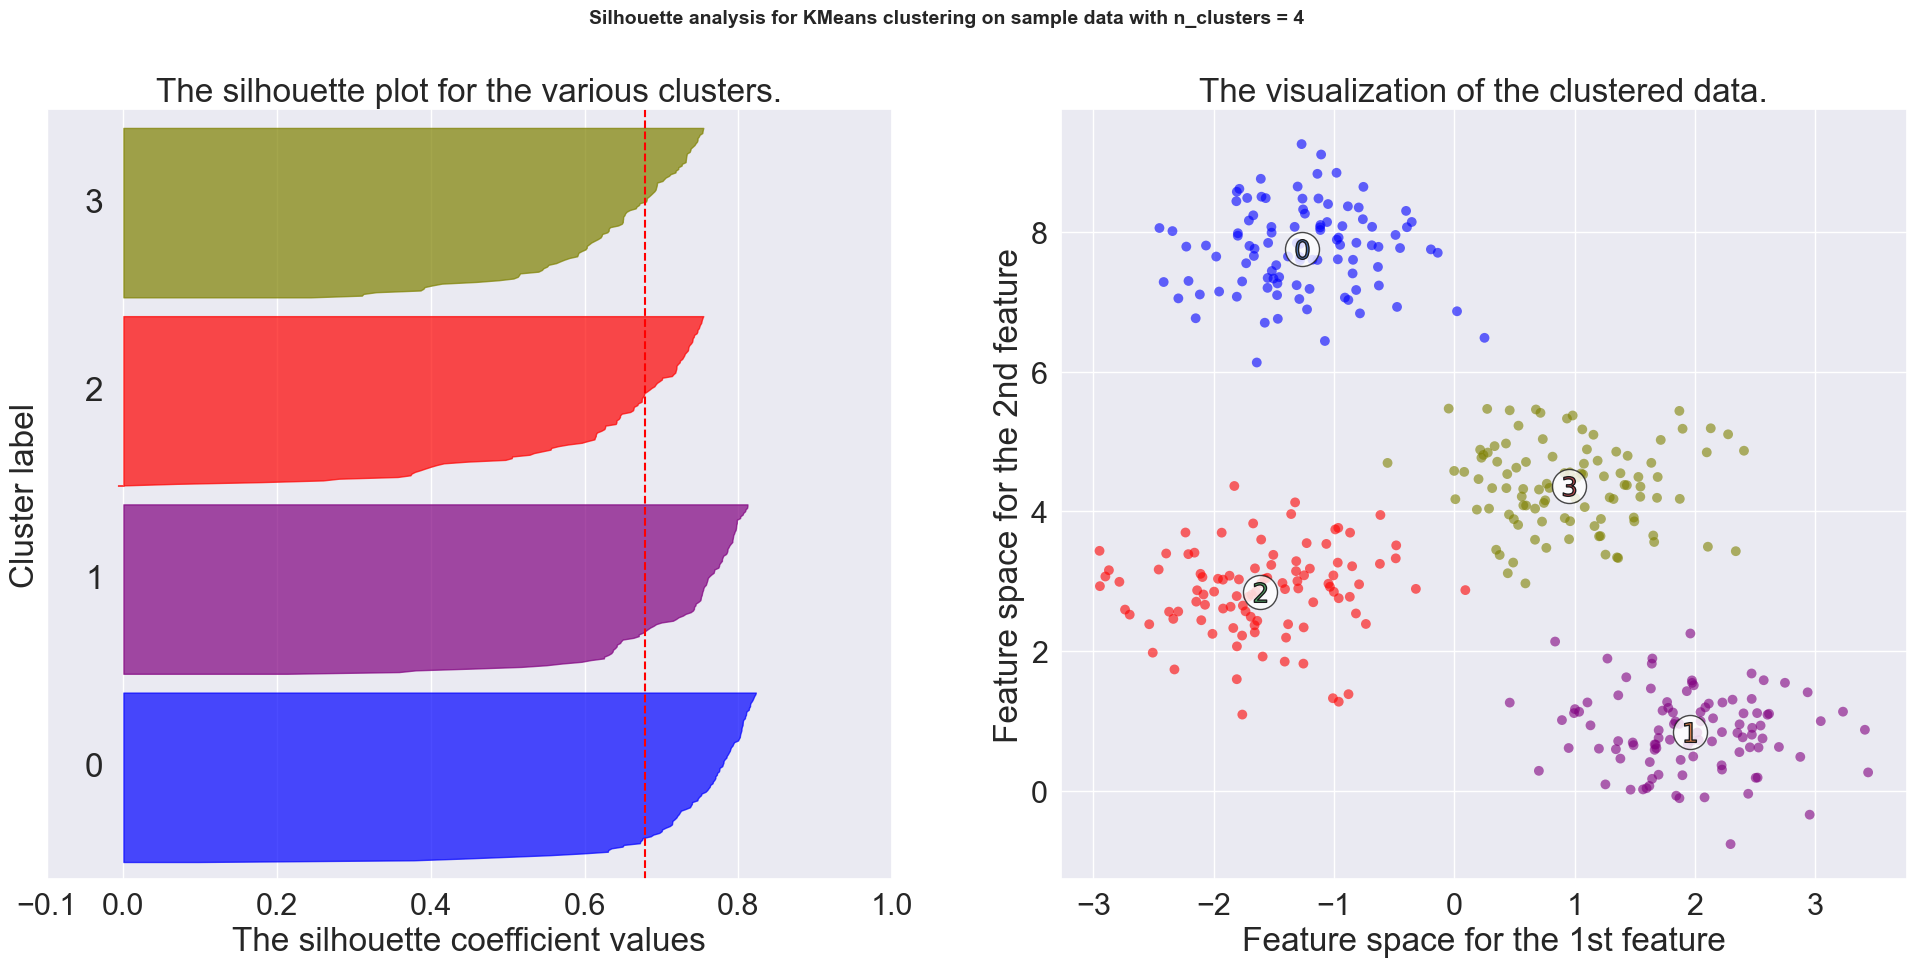

For n_clusters = 5 The average silhouette_score is : 0.5649260817808384


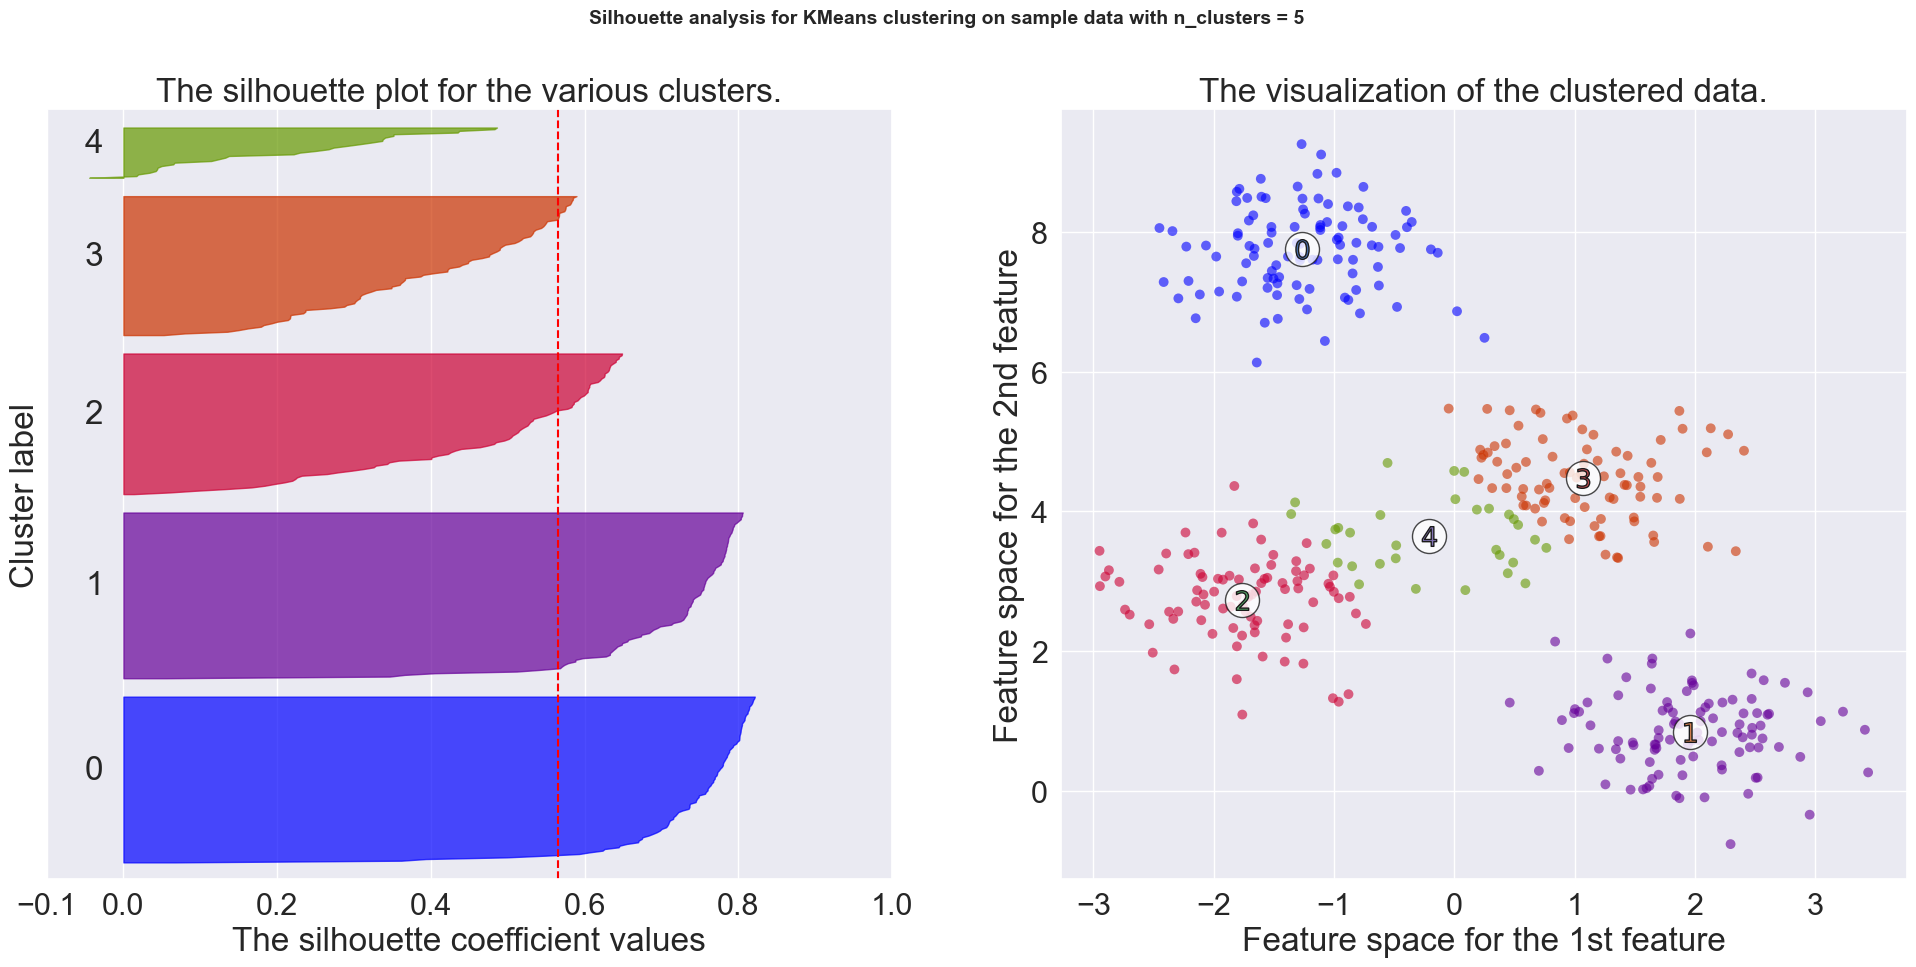

For n_clusters = 6 The average silhouette_score is : 0.4604177633005752


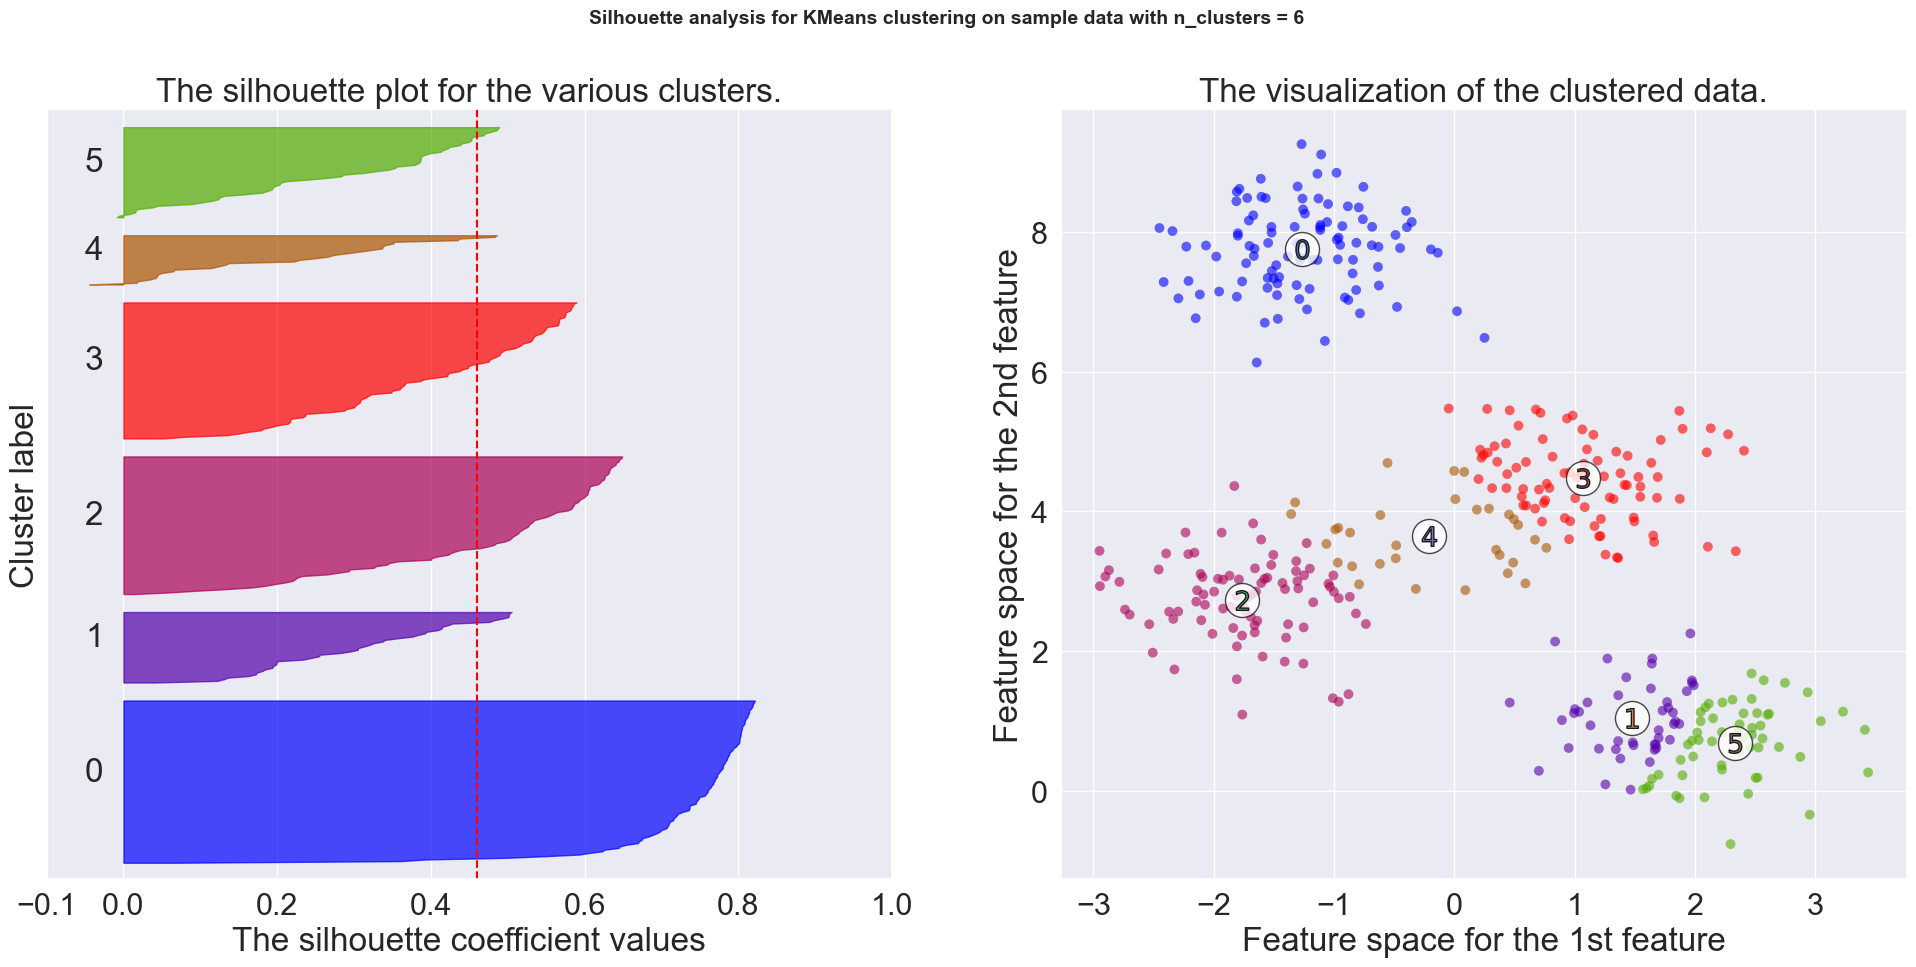

For n_clusters = 7 The average silhouette_score is : 0.4147310004540358


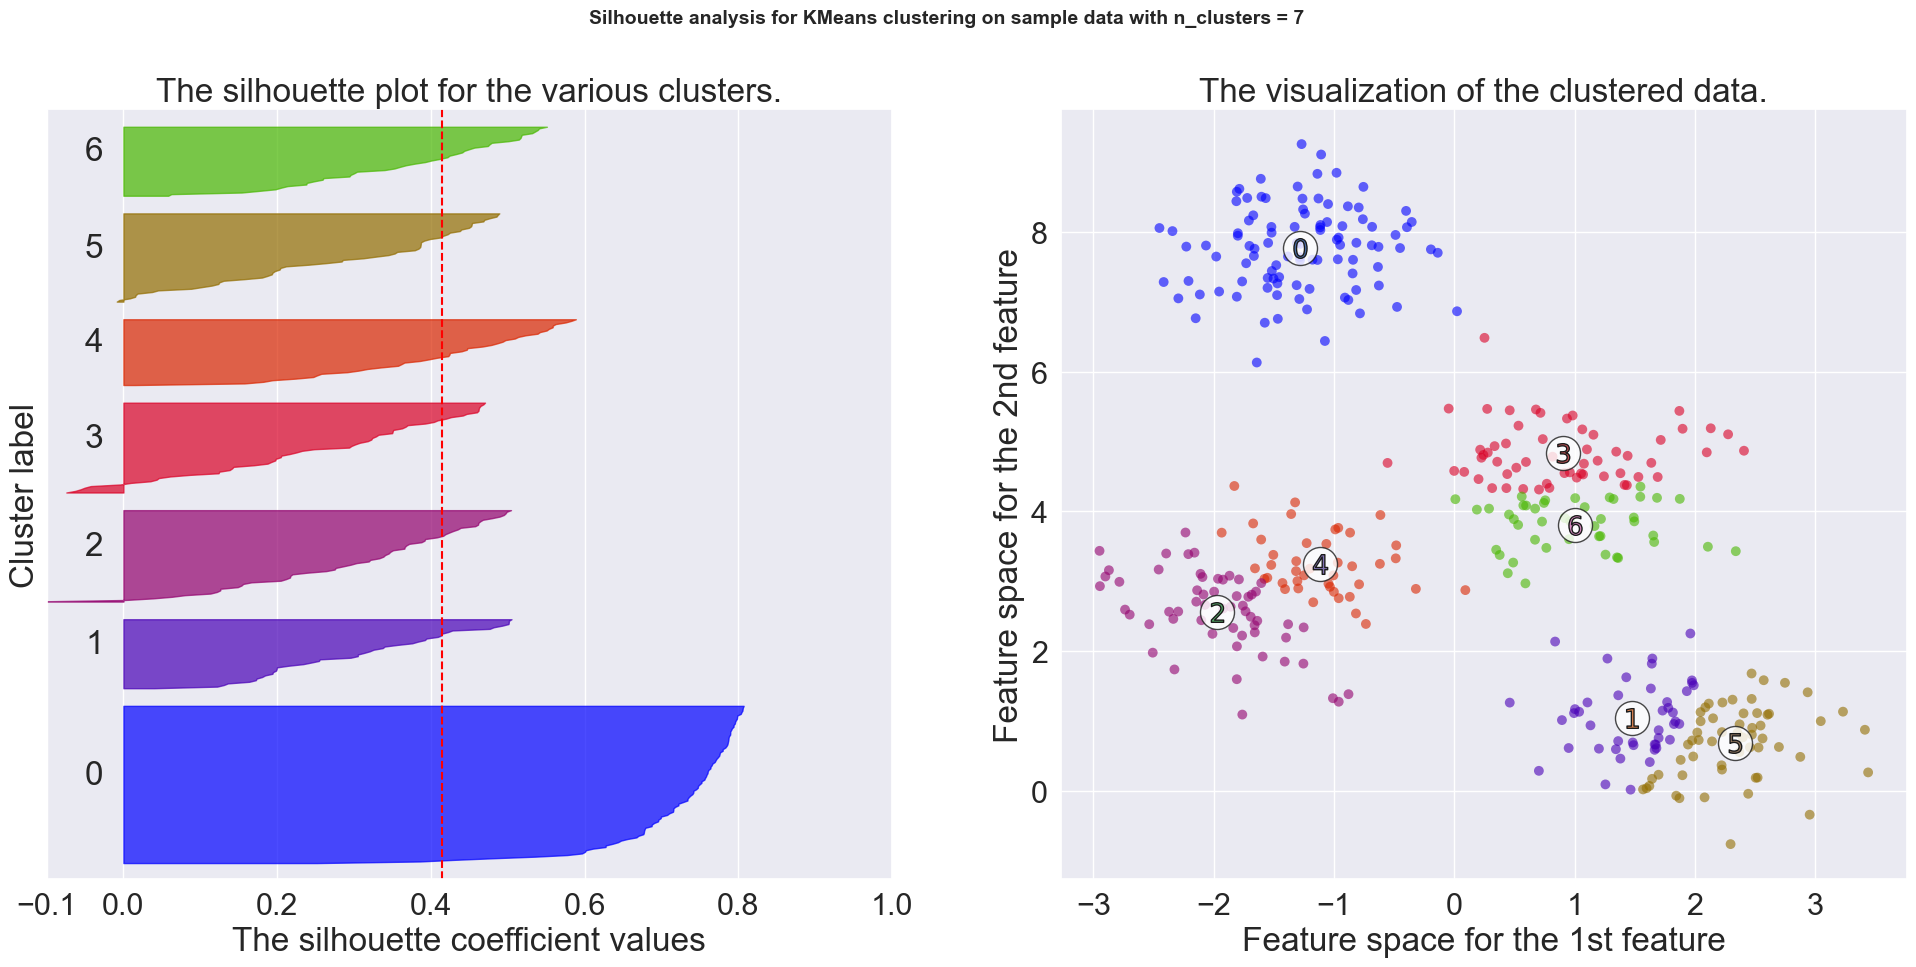

For n_clusters = 8 The average silhouette_score is : 0.38565820173273074


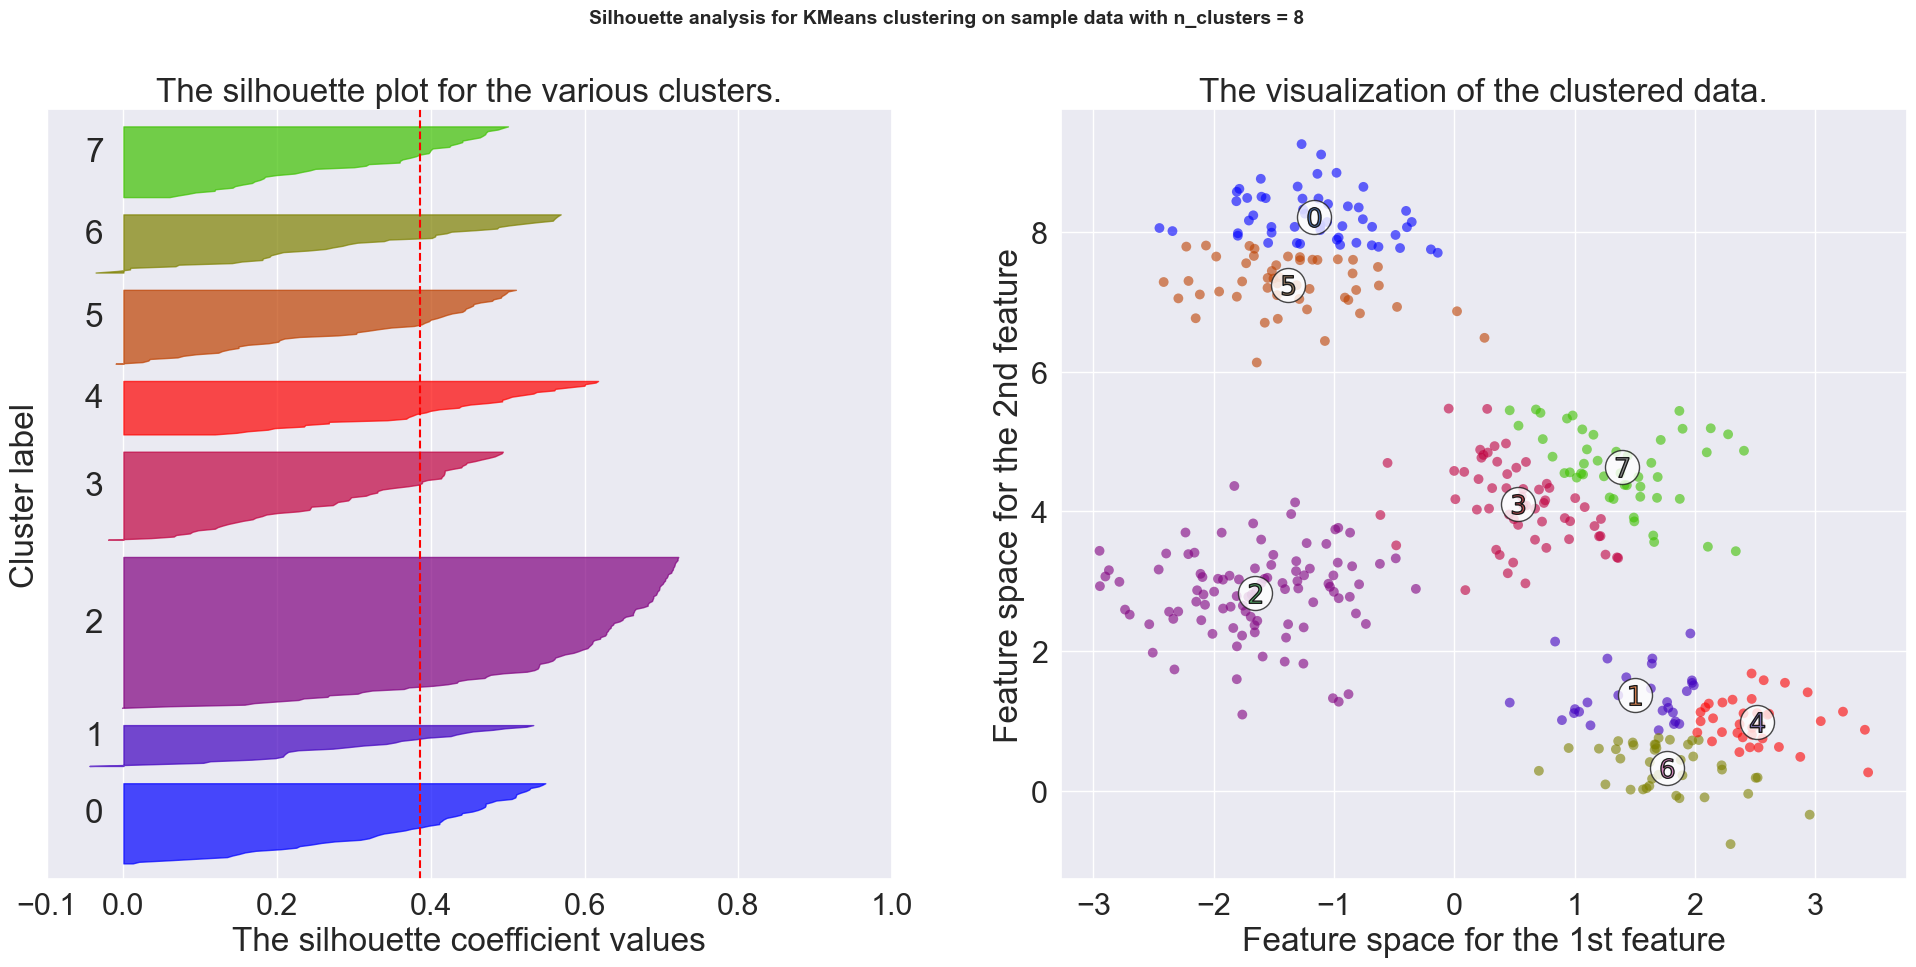

For n_clusters = 9 The average silhouette_score is : 0.3711039597756449


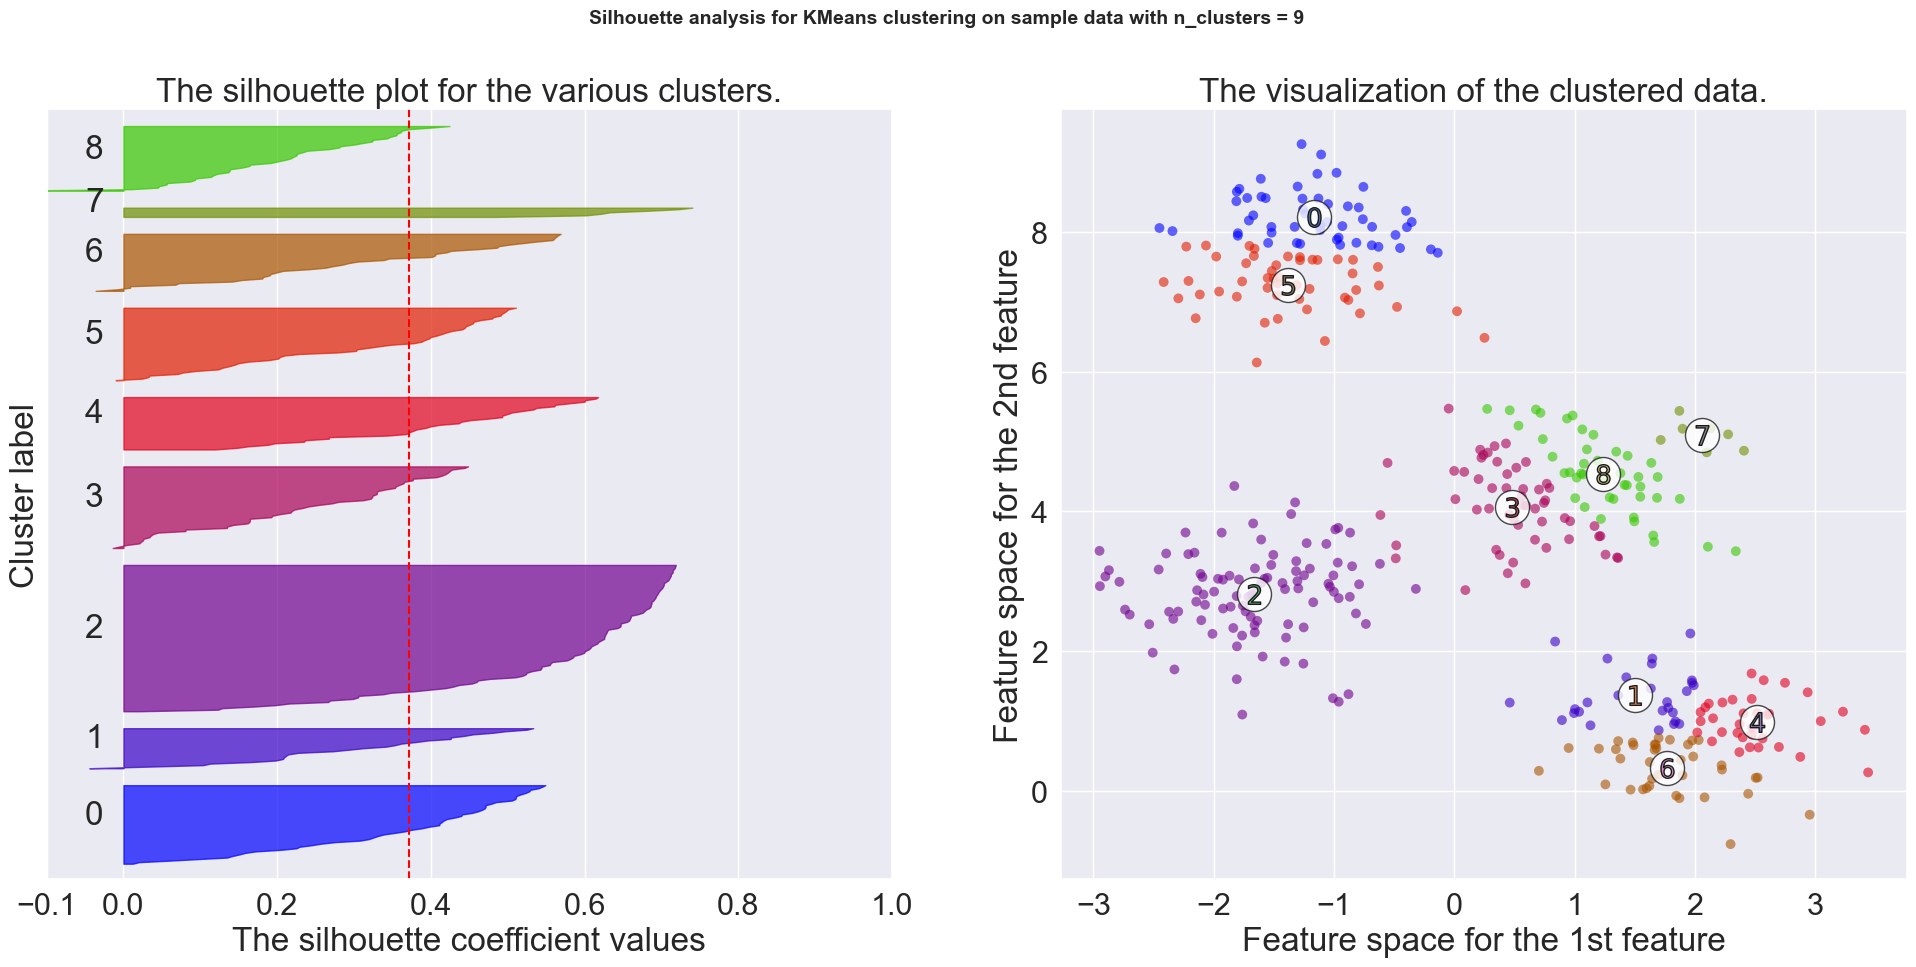

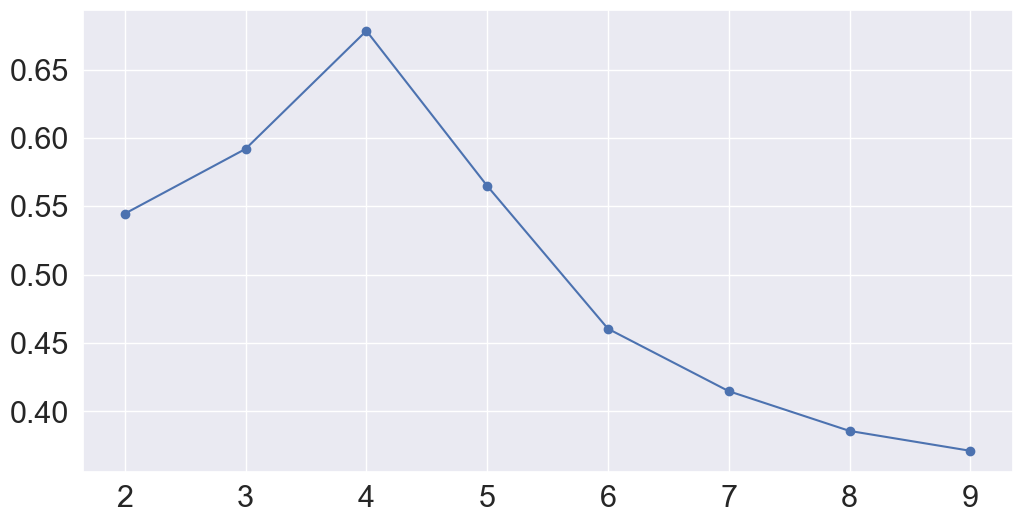

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X, _ = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)


cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )

    dim1, dim2 = 0,1
    
    ax2.scatter(X[:, dim1], X[:, dim2], marker='.', s=200, lw=0, alpha=0.6,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, dim1], centers[:, dim2], marker='o',
                c="white", alpha=.8, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[dim1], c[dim2], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(12,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()